In [83]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import seaborn as sns

import spacy

import os
import gensim
from tqdm import tqdm


#os.chdir('/data/cellardata/users/btsui/DEEP_NLP/NLP_spacy')

import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [84]:
%time model=gensim.models.Word2Vec.load ('./Data/pmc_word2_vec.gensim')


CPU times: user 15.1 s, sys: 1.26 s, total: 16.4 s
Wall time: 16.4 s


In [85]:
wordCountS=pd.Series({word_text:word_model.count for word_text,word_model in  model.wv.vocab.items()})

In [86]:
myDict={}
for i in tqdm(np.arange(5,1000,10)):
    myDict[i] =(wordCountS>i).sum()

100%|██████████| 100/100 [00:03<00:00, 27.15it/s]


In [87]:
#worCountS=pd.Series(myDict)

In [88]:
#worCountS

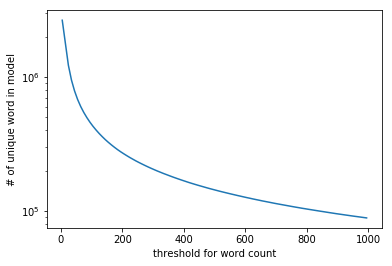

In [89]:
ax=pd.Series(myDict).plot()
ax.set_yscale('log')
ax.set_ylabel('# of unique word in model')
ax.set_xlabel('threshold for word count')
ax.figure.savefig('./Results/Figures/word_count.pdf')
ax.figure.savefig('./Results/Figures/word_count.png',dpi=300)

In [90]:
!echo $PWD/./Results/Figures/word_count.pdf

/data/cellardata/users/btsui/DEEP_NLP/NLP_spacy/./Results/Figures/word_count.pdf


## filter the samples based on the count

In [91]:

%time pmc_word2_vecDf=pd.read_csv('./Data/pmc_word2_vec.txt',sep=' ',skiprows=1,header=None)

pmc_word2_vecDf_clean=pmc_word2_vecDf.set_index(0)


CPU times: user 59.4 s, sys: 1.52 s, total: 1min
Wall time: 56.1 s


In [92]:
threshold=10 # at least 100 per sentence, reduce model size by 10 folds

In [93]:
selectedWords=wordCountS.index[wordCountS>=threshold]

In [94]:
m=pmc_word2_vecDf_clean.index.isin(selectedWords)

In [95]:
pmc_word2_vecDf_sub=pmc_word2_vecDf_clean[m]

In [98]:
pmc_word2_vecDf_sub.to_pickle('./Data/pmc_word2_vec.pandas.threshold.{}.pickle'.format(threshold))

In [99]:
wordCountS[wordCountS.index.str.contains('smart')&wordCountS.index.str.contains('seq')]

smart-seq2    253
smart-seq     120
smartseq2      32
smartseq       13
dtype: int64

In [101]:
'./Data/pmc_word2_vec.pandas.threshold.{}.pickle'.format(threshold)

'./Data/pmc_word2_vec.pandas.threshold.200.pickle'